<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="GL-2.png">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass-Lab  <br>(Week 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Earthquake data)
The data records the earthquakes experienced for the last few years in the USA. There are four parameters in the data, where each data point represents an earthquake.

**Latitude**: Latitude of the place (above the equator)

**Longitude**: Longitude of the place (west of the prime meridian)

**DepthMeters**: Absolute height of the place

**Magnitude**: Magnitude of the earthquake wave

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[K-means Clustering](#k-means)**
3. **[Interpret the Clusters](#inter)**

#### Import the required libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

import matplotlib.cm as cm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#### Load the csv file and print the first five observations.

In [2]:
df_earthquake = pd.read_csv("Earthquake_Data.csv")

In [3]:
df_earthquake

,Latitude,Longitude,DepthMeters,Magnitude
0,39.644000,-75.483000,5000,2.800000
1,37.379000,-80.746000,11500,2.800000
2,45.296000,-73.475000,18000,2.100000
3,42.825000,-78.239000,5000,2.400000
4,38.619000,-80.909000,100,3.400000
5,38.675000,-80.820000,2300,2.400000
6,38.818000,-80.430000,17000,2.500000
7,38.792000,-80.398000,10700,2.500000
8,39.433000,-81.362000,5000,2.800000
9,41.514000,-80.333000,5000,2.700000


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find the number of variables and the number of observations in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
num_variables = df_earthquake.shape[1]
num_observations = df_earthquake.shape[0]

print(f'The data has {num_variables} variables and {num_observations} observations.')

The data has 4 variables and 1647 observations.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype of each variable in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df_earthquake.dtypes

Latitude       float64
Longitude      float64
DepthMeters      int64
Magnitude      float64
dtype: object

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Find if there are missing values in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
val_missing = df_earthquake.isnull().sum()

print(f'The data has {val_missing.sum()} missing values in total:')
print(val_missing)

The data has 0 missing values in total:
Latitude       0
Longitude      0
DepthMeters    0
Magnitude      0
dtype: int64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Obtain the summary statistic of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
df_earthquake.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,1647.000000,1647.000000,1647.000000,1647.000000
mean,39.903436,-79.008111,7559.720704,2.384827
std,2.410973,3.192442,5205.963953,0.459781
min,37.007700,-82.881000,100.000000,0.200000
25%,37.902400,-81.694150,3450.000000,2.100000
50%,38.477800,-80.831400,6400.000000,2.400000
75%,41.467200,-75.934050,11500.000000,2.600000
max,45.300900,-73.063400,32300.000000,5.200000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the outliers in the dataset using boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

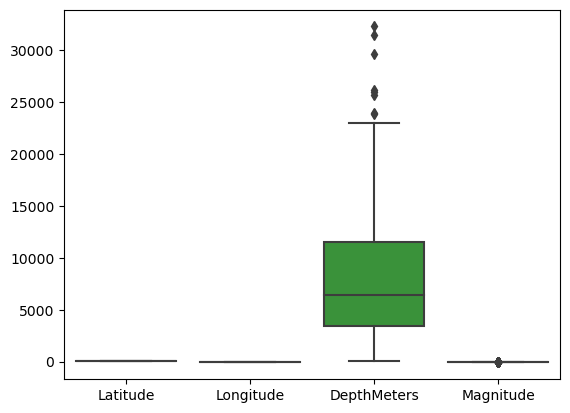

In [8]:
sns.boxplot(data=df_earthquake)
plt.show()

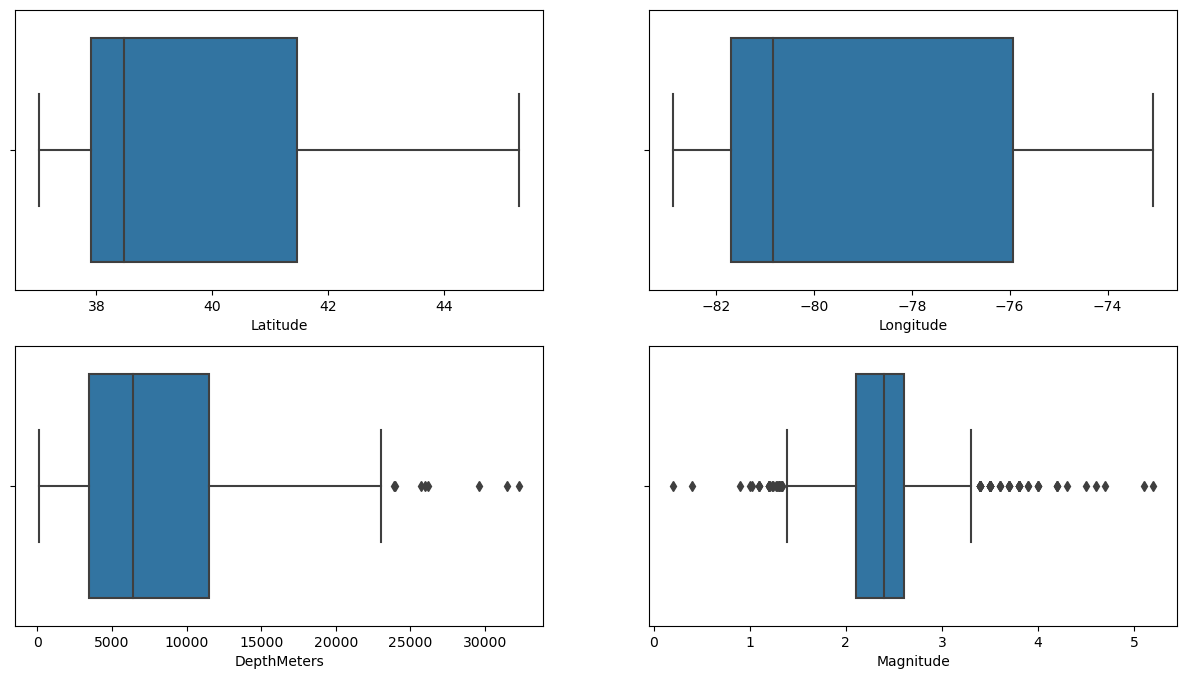

In [9]:
# fix the size, number of rows, number of columns of subplot.
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_earthquake.columns, ax.flatten()):   
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_earthquake[variable], ax = subplot)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using the IQR method and check the shape of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
Q1 = df_earthquake.quantile(0.25)
Q3 = df_earthquake.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_earthquake = df_earthquake[~((df_earthquake < lower_bound) | (df_earthquake > upper_bound)).any(axis=1)]

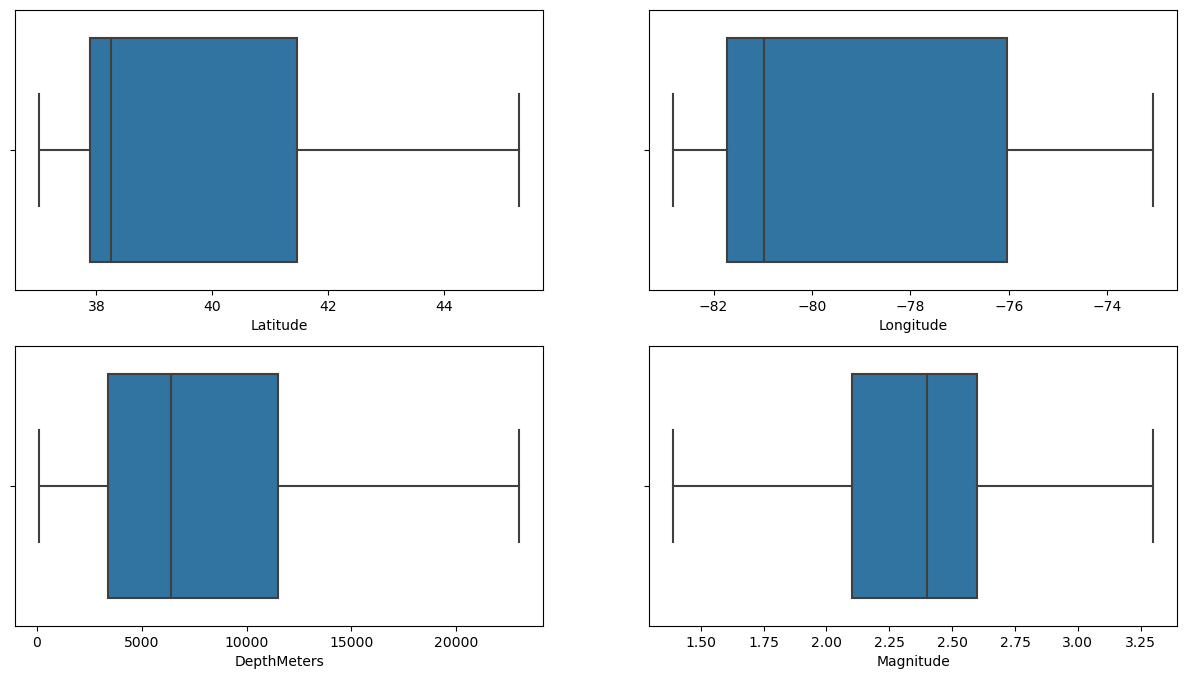

In [11]:
# fix the size, number of rows, number of columns of subplot.
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_earthquake.columns, ax.flatten()):   
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_earthquake[variable], ax = subplot)

# display the plot
plt.show()

In [12]:
df_earthquake.shape

(1562, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Drop the variables representing the geographical coordinates of the earthquake.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
df_eq_copy = df_earthquake.copy()

In [14]:
df_eq_copy

,Latitude,Longitude,DepthMeters,Magnitude
0,39.644000,-75.483000,5000,2.800000
1,37.379000,-80.746000,11500,2.800000
2,45.296000,-73.475000,18000,2.100000
3,42.825000,-78.239000,5000,2.400000
5,38.675000,-80.820000,2300,2.400000
6,38.818000,-80.430000,17000,2.500000
7,38.792000,-80.398000,10700,2.500000
8,39.433000,-81.362000,5000,2.800000
9,41.514000,-80.333000,5000,2.700000
10,40.859000,-74.179000,2000,2.100000


In [17]:
df_eq = df_eq_copy.drop(["Latitude", "Longitude"], axis=1)

In [18]:
df_eq

,DepthMeters,Magnitude
0,5000,2.800000
1,11500,2.800000
2,18000,2.100000
3,5000,2.400000
5,2300,2.400000
6,17000,2.500000
7,10700,2.500000
8,5000,2.800000
9,5000,2.700000
10,2000,2.100000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables such that it will have mean 0 and standard deviation 1 and print the summary statistics.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
scaled_features = StandardScaler().fit_transform(df_eq)

scaled_features

array([[-0.48890768,  1.25239414],
       [ 0.80353035,  1.25239414],
       [ 2.09596838, -0.73501951],
       ...,
       [-0.86669725, -0.73501951],
       [ 1.89713176, -0.45110327],
       [ 2.27492133, -0.45110327]])

In [20]:
summary = pd.DataFrame(scaled_features , columns = df_eq.columns)

round(summary.describe())

,DepthMeters,Magnitude
count,1562.000000,1562.000000
mean,0.000000,0.000000
std,1.000000,1.000000
min,-1.000000,-3.000000
25%,-1.000000,-1.000000
50%,-0.000000,0.000000
75%,1.000000,1.000000
max,3.000000,3.000000


In [21]:
summary.shape

(1562, 2)

<a id="k-means"> </a>
## 2. K-means Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find within cluster sum of squares for the number of clusters from 1 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,8):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(df_eq)
    wcss.append(kmeans.inertia_)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the elbow plot to get the optimal value of K.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

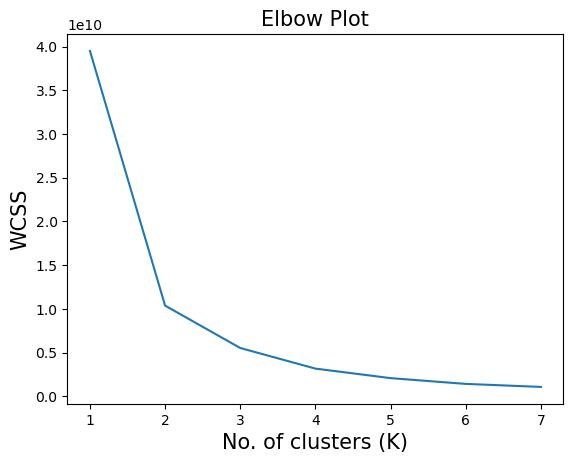

In [24]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,8), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the silhouette coefficient for the number of clusters from 2 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6, 7, 8]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(summary)
    score = silhouette_score(summary, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.3743704735416158)
For 3 clusters the silhouette score is 0.39268003903375004)
For 4 clusters the silhouette score is 0.3675083071920705)
For 5 clusters the silhouette score is 0.3448574750320023)
For 6 clusters the silhouette score is 0.3458336784043734)
For 7 clusters the silhouette score is 0.34742781068930273)
For 8 clusters the silhouette score is 0.32712814183995087)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Plot of silhouette coefficients using appropriate graphical method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# consider an empty list to store the silhouette
silhouette_coefficients = []

# use 'for' loop to build the clusters
# pass the range to iterate the value of k
# last number in the range() is exclusive
for k in range(2,8):
    
    # perform K-means with different K values
    kmeans = KMeans(n_clusters=k, random_state=10)
    # fit and predict on the scaled data
    kmeans.fit(scaled_features)
    
    # 'silhouette_score' function computes the silhouette score for each K
    # 'random_state' returns the same sample each time you run the code  
    score = silhouette_score(scaled_features,kmeans.labels_, random_state=10)
    
    # append score to 'silhouette_coefficients'
    silhouette_coefficients.append(score)
    
# print the silhouette coefficients
print(silhouette_coefficients)

[0.3743704735416158, 0.39268003903375004, 0.3675083071920705, 0.3448574750320023, 0.3458336784043734, 0.34742781068930273]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Visualize the silhouette scores using silhouette plot and obtain the clusters for K from 2 to 6.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

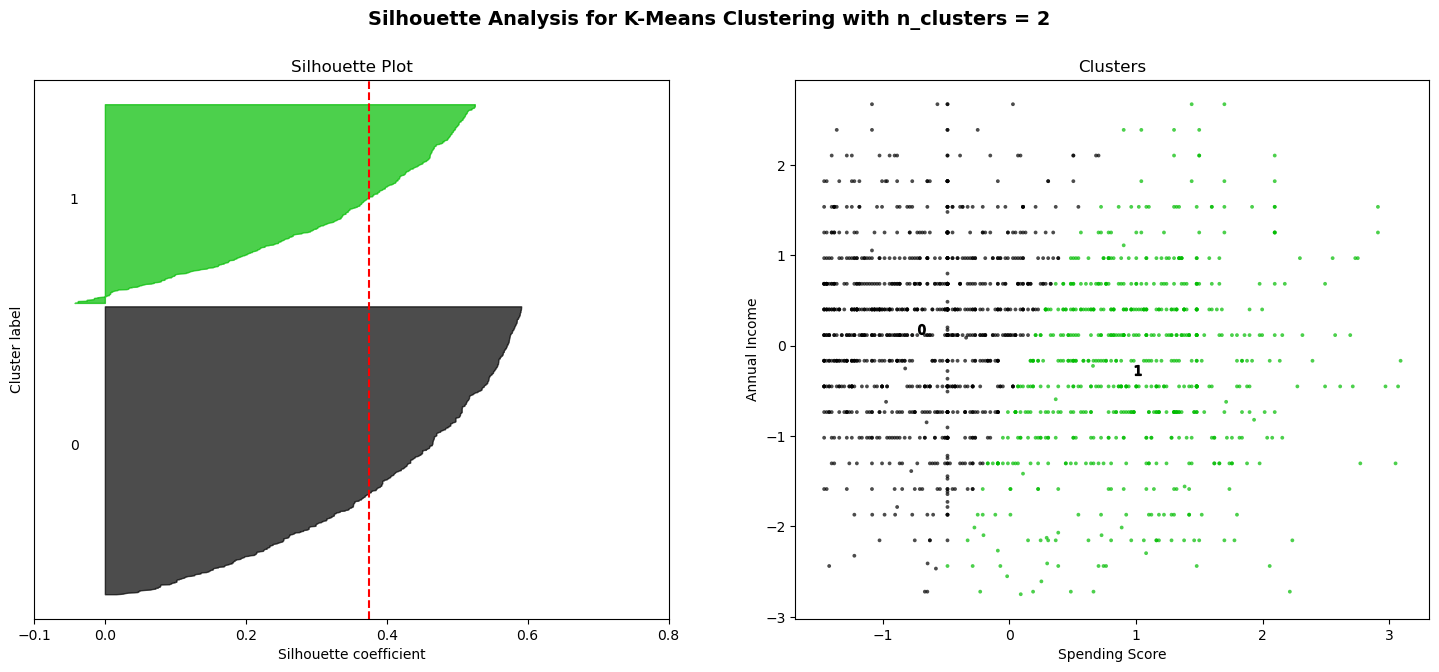

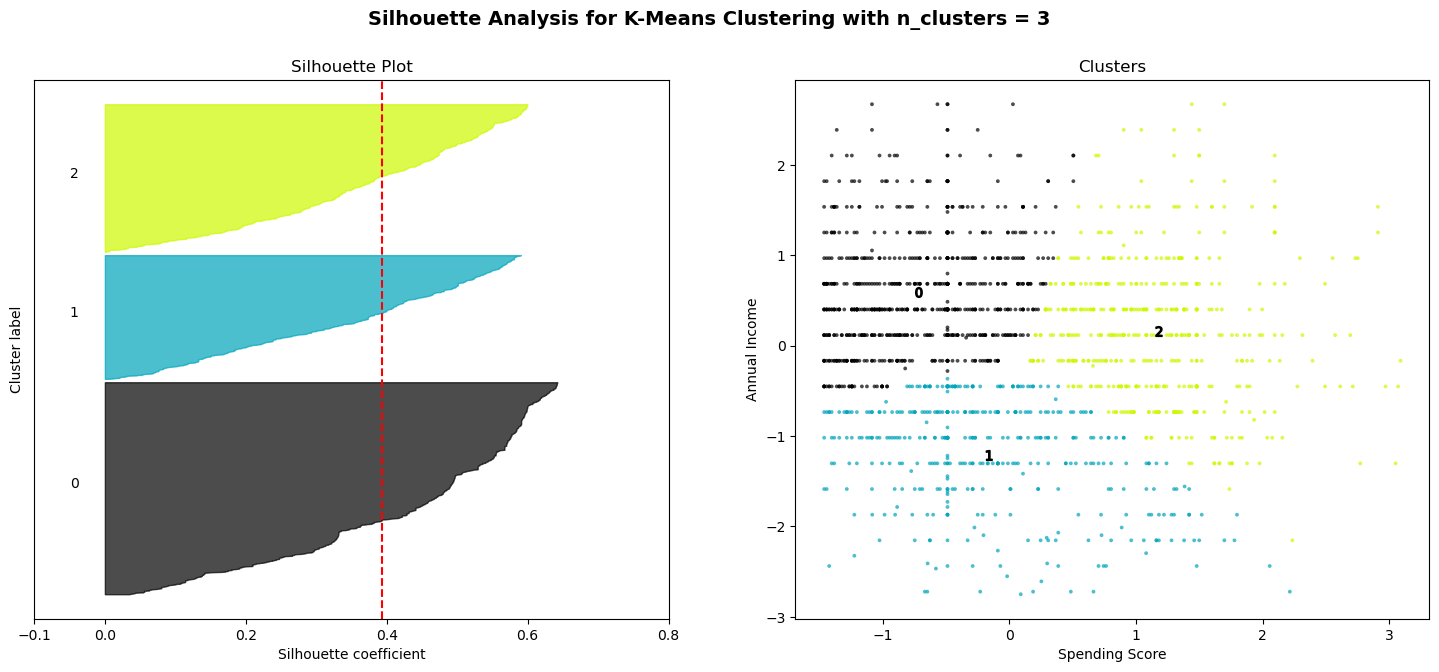

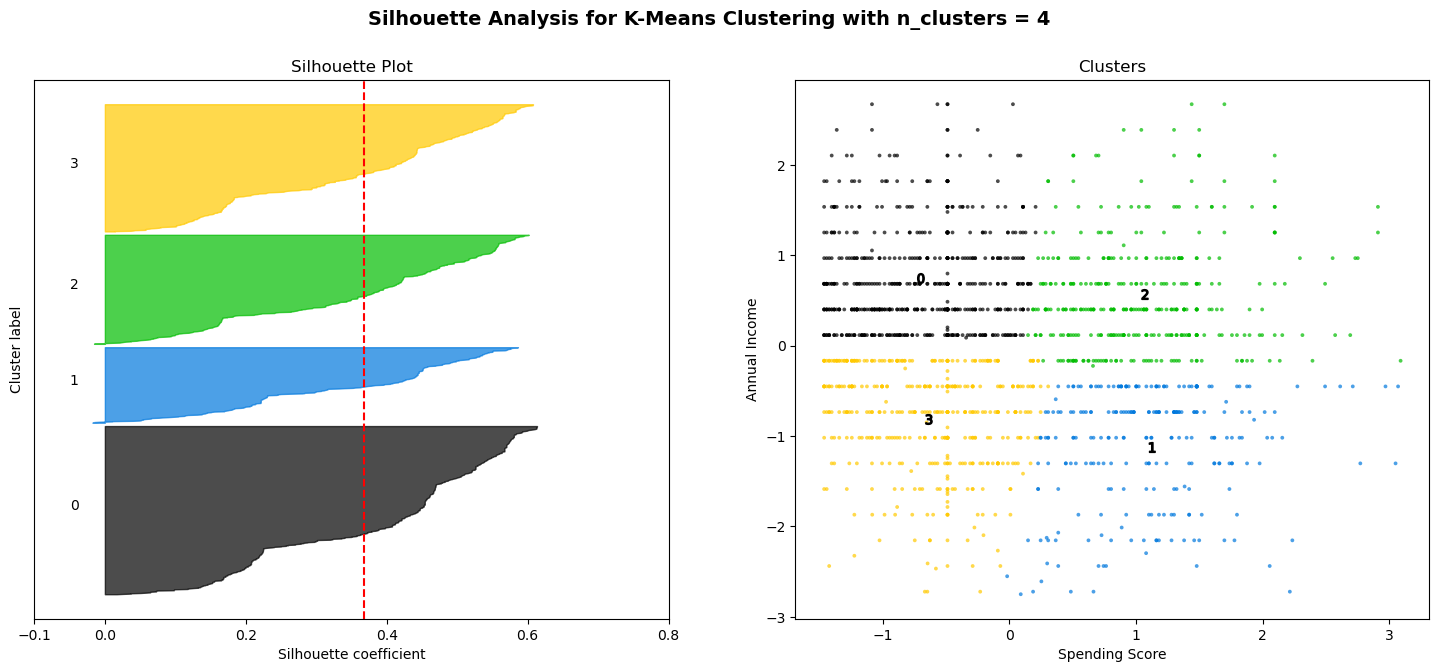

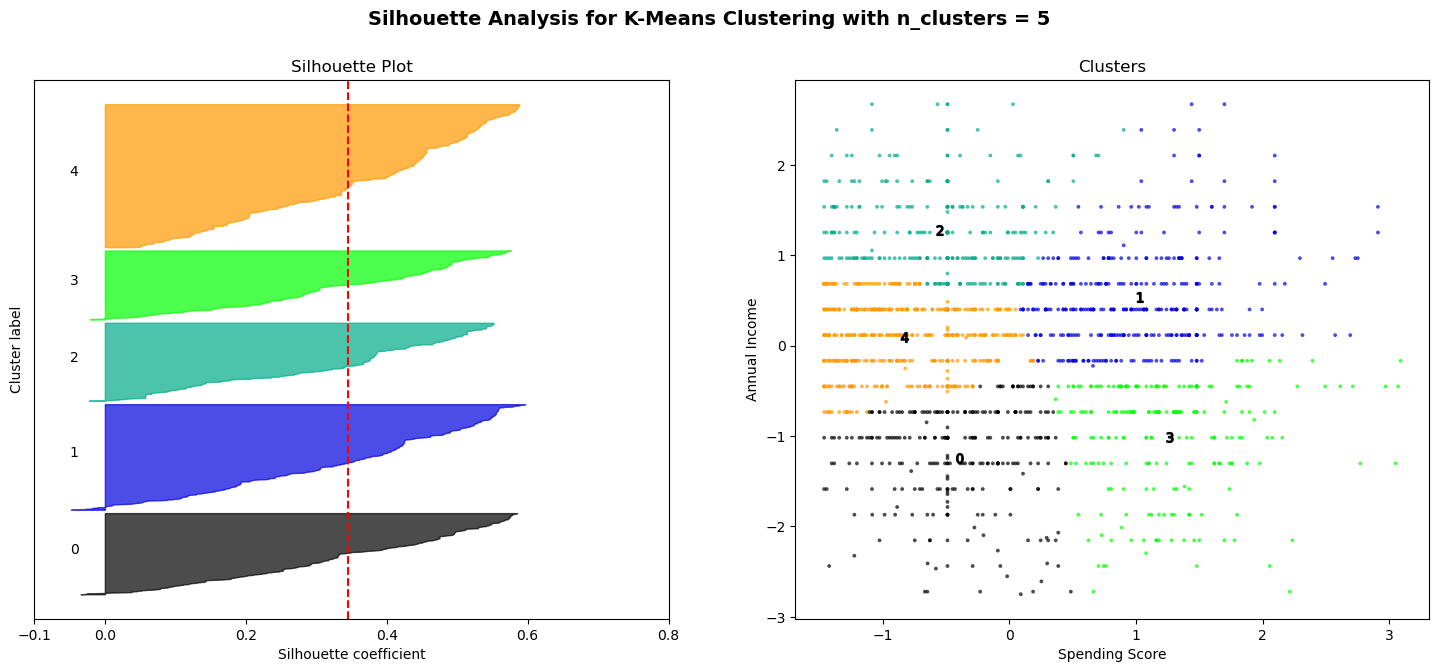

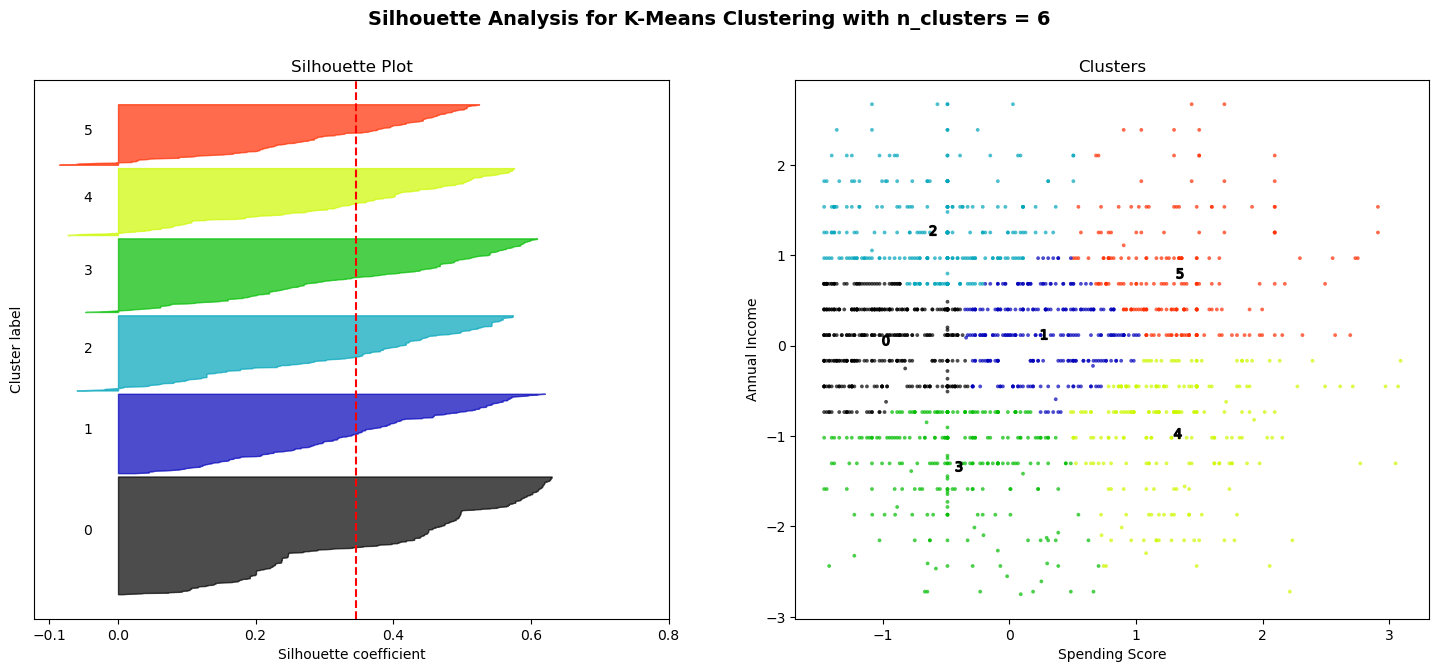

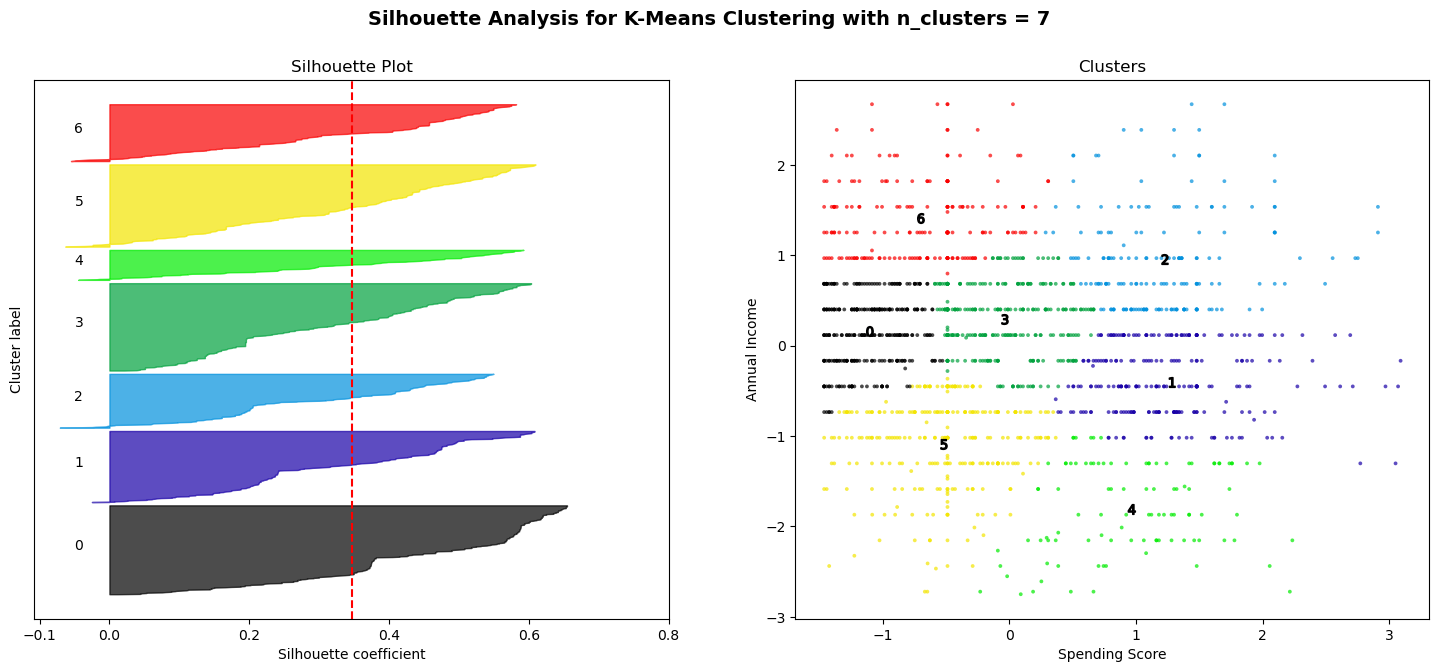

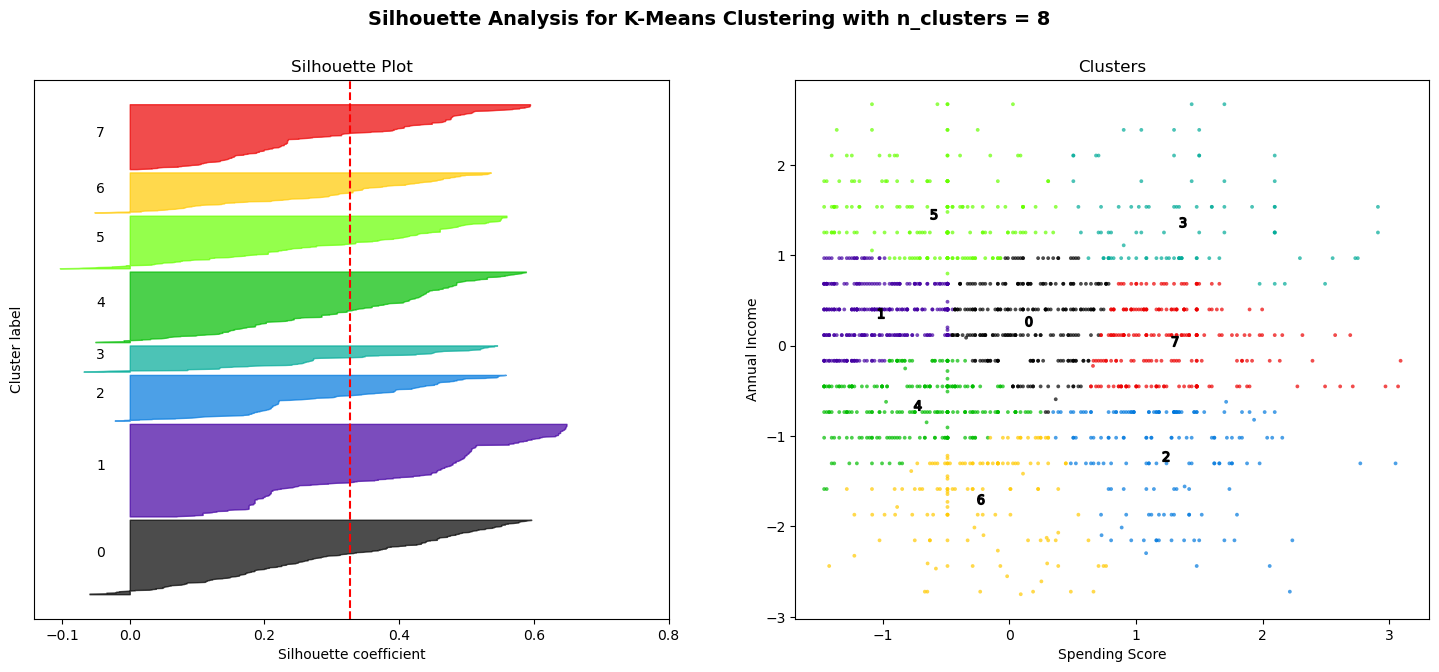

In [27]:
# consider the number of clusters
n_clusters = [2, 3, 4, 5, 6, 7, 8]

# consider an array of the data
X = np.array(summary)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Fit K means clustering algorithm with an optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
Kmeans3 = KMeans(n_clusters = 3 , random_state = 15 , max_iter = 200)

Kmeans3.fit(scaled_features)

KMeans(max_iter=200, n_clusters=3, random_state=15)

<a id="inter"> </a>
## 3. Interpret the Clusters

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Consider the groups formed in the previous question and display the size of each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# store the lables in 'result'
result = Kmeans3.labels_

result

array([1, 0, 0, ..., 2, 0, 0])

In [30]:
result = pd.DataFrame(result, columns = ["cluster"])

# group the data based on cluster labels and get size of each cluster
obs = result.groupby('cluster').size()

# print the cluster size
obs

cluster
0    477
1    685
2    400
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Plot the number of observations in each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

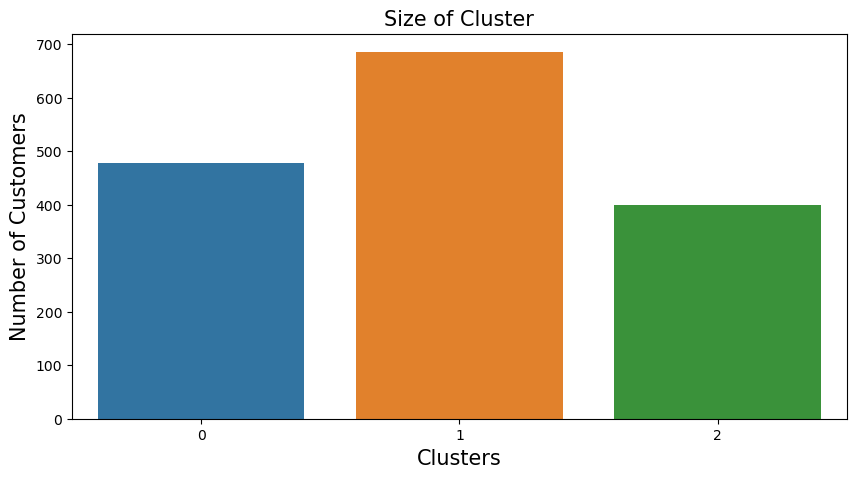

In [31]:
plt.figure(figsize = (10,5))
sns.countplot(data= result, x = 'cluster')

plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

plt.show()

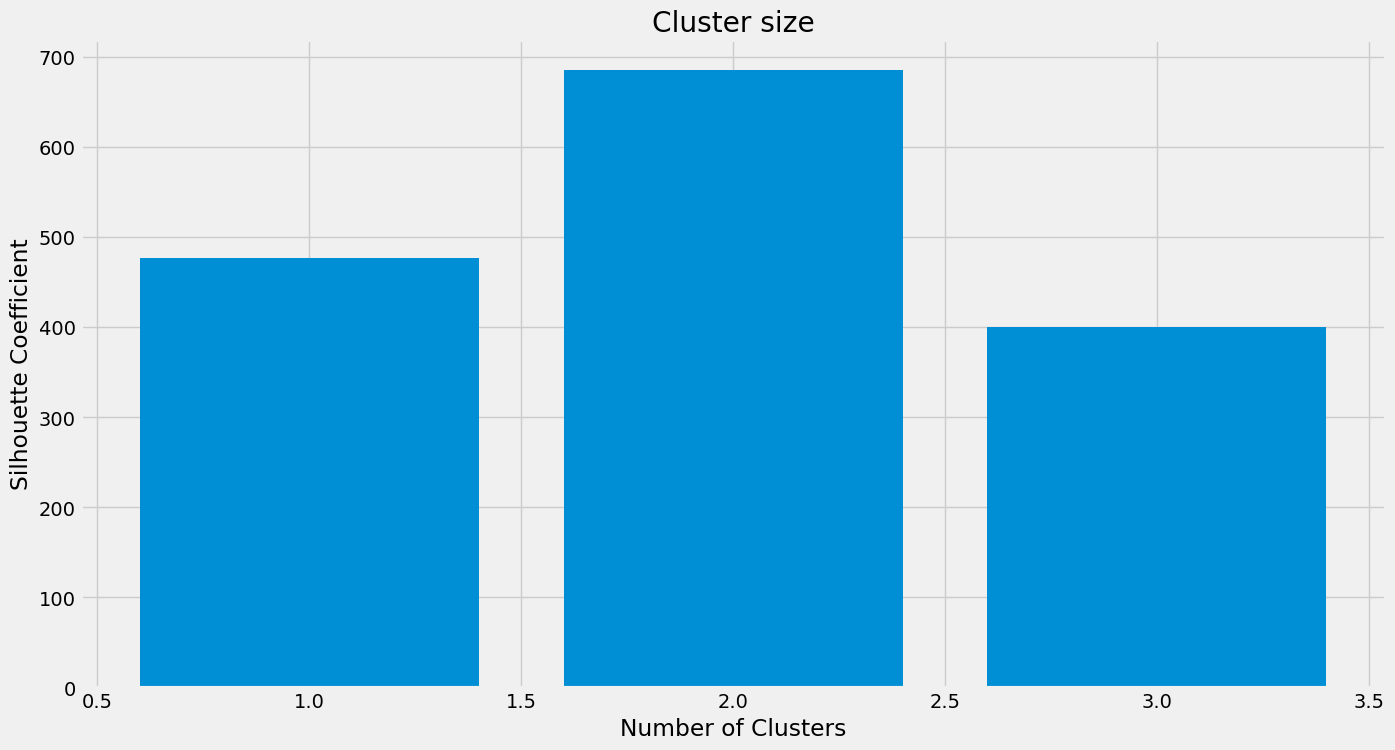

In [32]:
plt.style.use("fivethirtyeight")

# set the figure size using 'figsize'
plt.figure(figsize=(15,8))

# plot bar plot of silhouette coefficients
# last number in the range() is exclusive
plt.bar(range(1,4), obs)

# add axes and plot labels
plt.title('Cluster size')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

# display the bar plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the centroids of the clusters formed using K-means clustering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
centroids = Kmeans3.cluster_centers_
centroids

array([[ 1.17474623,  0.16696511],
       [-0.71964524,  0.59192623],
       [-0.16849241, -1.21277955]])

In [35]:
centroids = pd.DataFrame(centroids , columns = df_eq.columns)

centroids

,DepthMeters,Magnitude
0,1.174746,0.166965
1,-0.719645,0.591926
2,-0.168492,-1.212780


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Obtain the observations belonging to the 1st cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
df1 = df_earthquake[Kmeans3.labels_ == 0]
df1

,Latitude,Longitude,DepthMeters,Magnitude
1,37.379000,-80.746000,11500,2.800000
2,45.296000,-73.475000,18000,2.100000
6,38.818000,-80.430000,17000,2.500000
7,38.792000,-80.398000,10700,2.500000
12,44.964000,-74.588000,17000,2.400000
13,44.673000,-73.841000,10000,2.600000
20,45.132000,-74.147000,18000,3.000000
21,45.219000,-74.362000,18000,2.600000
24,41.238000,-77.055500,10800,2.300000
26,44.895000,-74.523500,12500,2.700000


In [40]:
df1.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,477.000000,477.000000,477.000000,477.000000
mean,40.314354,-78.646559,13366.939203,2.417694
std,2.546376,3.250720,2846.765942,0.272955
min,37.179900,-82.548100,8300.000000,1.600000
25%,38.033300,-81.583500,11300.000000,2.200000
50%,39.697000,-80.485000,13100.000000,2.400000
75%,42.589000,-74.979500,14900.000000,2.600000
max,45.296000,-73.190000,23000.000000,3.300000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the observations belonging to the 2nd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
df2 = df_earthquake[Kmeans3.labels_ == 1]
df2

,Latitude,Longitude,DepthMeters,Magnitude
0,39.644000,-75.483000,5000,2.800000
3,42.825000,-78.239000,5000,2.400000
5,38.675000,-80.820000,2300,2.400000
8,39.433000,-81.362000,5000,2.800000
9,41.514000,-80.333000,5000,2.700000
11,41.110000,-80.680000,5000,2.600000
15,39.510000,-81.470000,5000,3.100000
16,39.422000,-81.205000,5000,2.600000
17,41.115000,-80.682000,5000,2.500000
22,43.356000,-78.634000,5000,2.500000


In [43]:
df2.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,685.000000,685.000000,685.000000,685.000000
mean,39.070120,-80.180605,3839.562044,2.567372
std,1.997227,2.657267,2515.001619,0.229455
min,37.050000,-82.616800,100.000000,2.200000
25%,37.800700,-81.979700,1500.000000,2.400000
50%,38.058200,-81.498000,3700.000000,2.500000
75%,40.204800,-78.973700,5600.000000,2.700000
max,45.290000,-73.249000,10000.000000,3.300000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Obtain the observations belonging to the 3rd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
df3 = df_earthquake[Kmeans3.labels_ == 1]
df3

,Latitude,Longitude,DepthMeters,Magnitude
0,39.644000,-75.483000,5000,2.800000
3,42.825000,-78.239000,5000,2.400000
5,38.675000,-80.820000,2300,2.400000
8,39.433000,-81.362000,5000,2.800000
9,41.514000,-80.333000,5000,2.700000
11,41.110000,-80.680000,5000,2.600000
15,39.510000,-81.470000,5000,3.100000
16,39.422000,-81.205000,5000,2.600000
17,41.115000,-80.682000,5000,2.500000
22,43.356000,-78.634000,5000,2.500000


In [45]:
df3.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,685.000000,685.000000,685.000000,685.000000
mean,39.070120,-80.180605,3839.562044,2.567372
std,1.997227,2.657267,2515.001619,0.229455
min,37.050000,-82.616800,100.000000,2.200000
25%,37.800700,-81.979700,1500.000000,2.400000
50%,38.058200,-81.498000,3700.000000,2.500000
75%,40.204800,-78.973700,5600.000000,2.700000
max,45.290000,-73.249000,10000.000000,3.300000
